In [63]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling

In [130]:
raw_data = pd.read_csv('raindata-day.csv', comment='#')
timestamped_data = pd.DataFrame({'mm': raw_data.mm.values},
                                index=pd.to_datetime(raw_data.date, dayfirst=True))

In [137]:
def plot_year(year):
    '''use the global timestamped_data to plot a year
    '''
    from datetime import datetime, timedelta
    # build the empty DataFrame
    duration = 365 + (year % 4 == 0 and 1 or 0)
    data = pd.DataFrame(index=[datetime(year, 1, 1) + timedelta(i, 0) for i in range(duration)])
    # populate it with the relevant data
    data['mm'] = timestamped_data.mm[(timestamped_data.index >= datetime(year, 1, 1)) &
                                     (timestamped_data.index < datetime(year + 1, 1, 1))]
    # fill in the blanks (the NaNs)
    data['mm'].fillna(0, inplace=True)

    # now construct the running sum, seven days
    window = 7
    a = data.mm.cumsum().values
    a[window:] -= a[:-window]

    # finally the plot, assuming that all will fit under the weekly
    # cumulative top: 350mm
    plt.figure(figsize=(18, 4))
    plt.bar(range(data.shape[0]), data.mm, width=1.2)
    plt.plot(a)
    plt.ylim(top = 350, bottom = 0)    

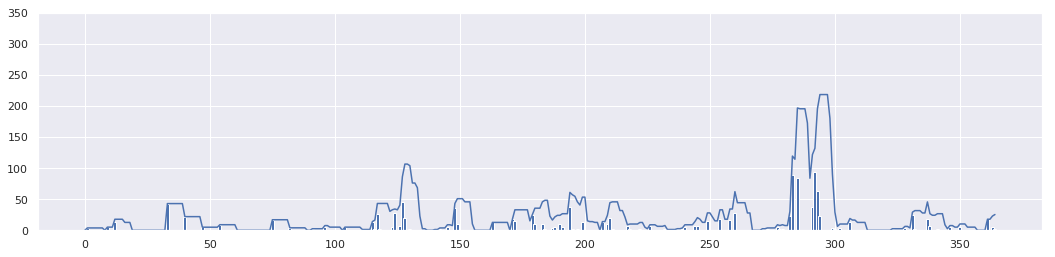

In [138]:
plot_year(2006)

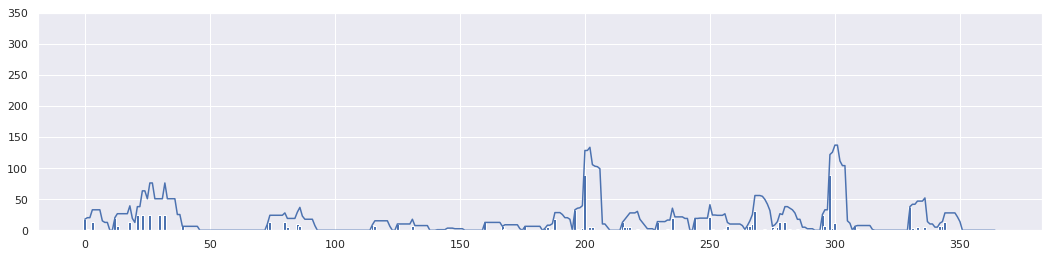

In [139]:
plot_year(2007)

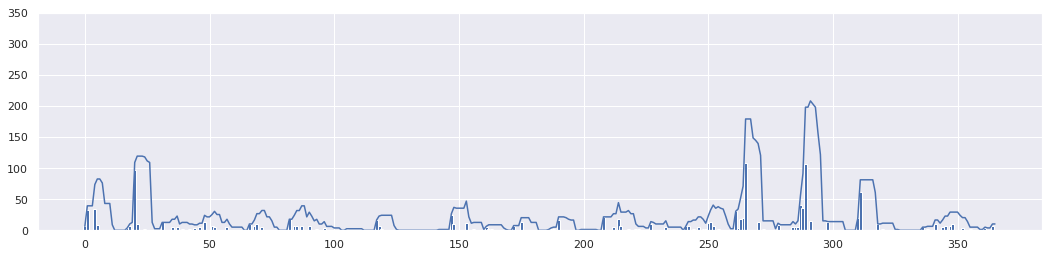

In [140]:
plot_year(2008)

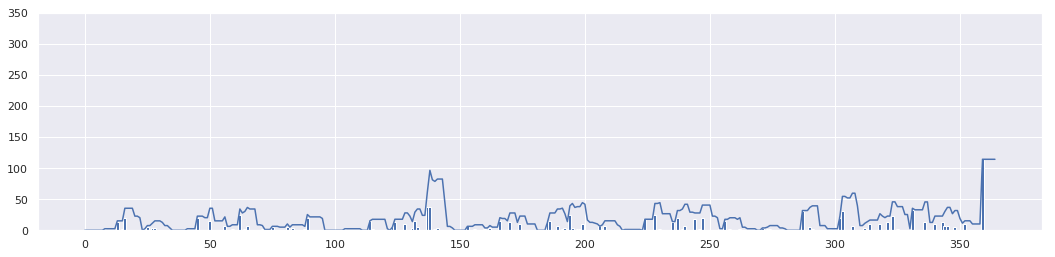

In [141]:
plot_year(2009)

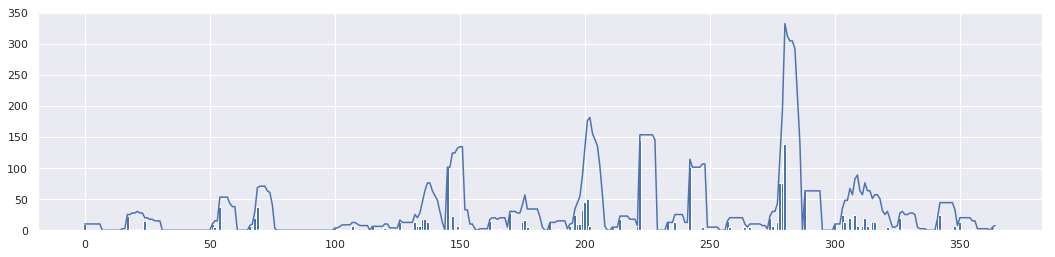

In [142]:
plot_year(2010)

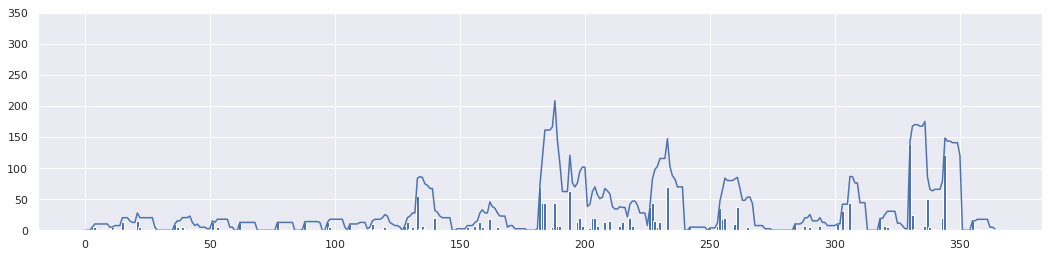

In [143]:
plot_year(2011)

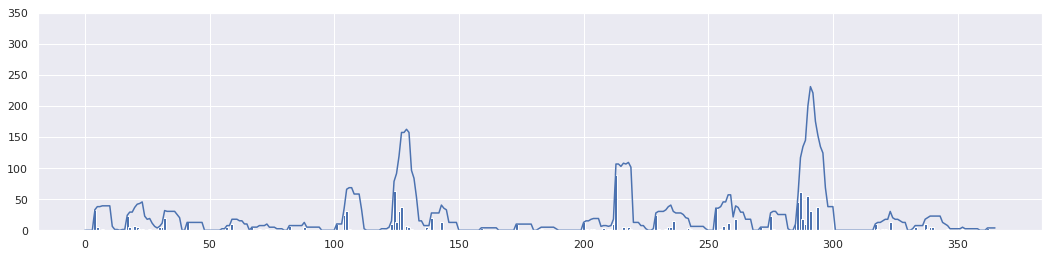

In [144]:
plot_year(2012)

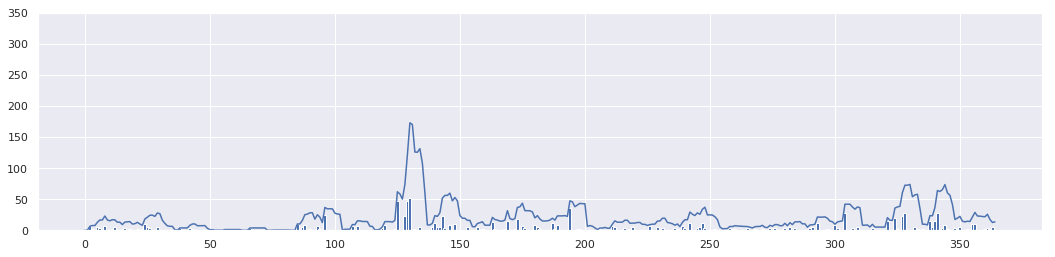

In [145]:
plot_year(2013)

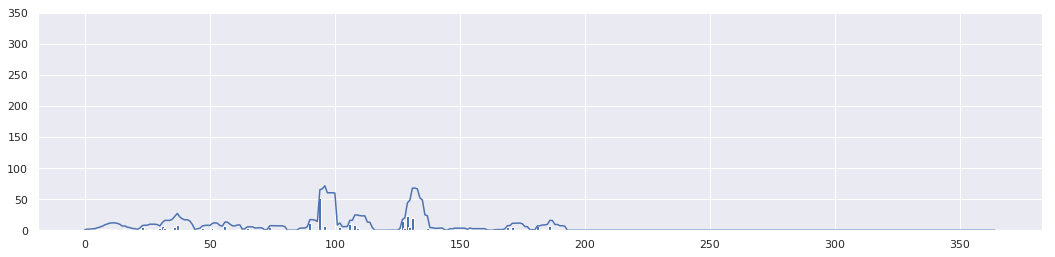

In [146]:
plot_year(2014)